In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

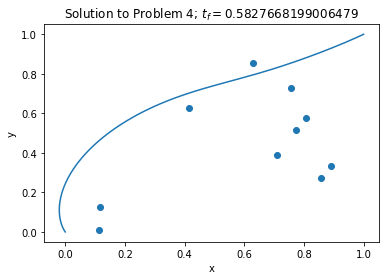

In [66]:
def find_best_path(start, end, obstacles = 10):
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    '''
    if isinstance(obstacles, int):
        obstacles = np.random.uniform(start,end,(obstacles,2))
    #print(obstacles)
    
    k_a, k_c = 0.1,0.5

    def hamiltonian(Y):
        x,y,vx,vy,p1,p2,p3,p4 = Y
        denominators = np.sum((obstacles-Y[:2])**2, axis = 1)**2
        return p1*vx + p2*vy + p3**2/(4*k_a) + p4**2/(4*k_a)\
                - 1 - k_c*np.sum(1/denominators)

    def ode(t,Y,t_f):
        ''' define the ode system '''
        #print(Y)
        px,py,vx,vy,p1,p2,p3,p4 = Y

        dx = vx
        dy = vy
        dvx = p3/(2*k_a)
        dvy = p4/(2*k_a)

        denominators = np.sum((obstacles[:,:,np.newaxis]-Y[:2])**2, axis = 1)**2
        dp1 = 2*k_c*np.sum((obstacles[:,0,np.newaxis]-Y[0])/denominators, axis = 0)
        dp2 = 2*k_c*np.sum((obstacles[:,1,np.newaxis]-Y[1])/denominators, axis = 0)
        dp3 = -p1
        dp4 = -p2

        return t_f[0]*np.array([dx,dy,dvx,dvy,dp1,dp2,dp3,dp4])
    
    def bc(ya,yb,t_f):
        ''' define the boundary conditions '''
        # ya are the initial values
        # yb are the final values
        # each entry of the return array will be set to zero
        left = np.array([ya[0]-start[0],ya[1]-start[1],ya[2],ya[3]])
        right = np.array([yb[0]-end[0],yb[1]-end[1],yb[2],yb[3]])
        h_tf = np.array([hamiltonian(yb)])
        return np.concatenate((left, right, h_tf))
    
    # give the time domain
    t_steps = 100
    t = np.linspace(0,1,t_steps)
    
    # give an initial guess
    y0 = np.zeros((8,t_steps))

    #start with an initial straight path
    #TODO: fix to make work with different start and end conditions
    y0[0], y0[1] = t, t
    y0[2:3] = 1

    t_f = np.array([1])
    
    # solve the system
    sol = solve_bvp(ode, bc, t, y0, t_f, max_nodes = 30000)

    # plot solution
    plt.plot(sol.y[0],sol.y[1])
    plt.scatter(obstacles[:,0],obstacles[:,1])
    plt.title(f"Solution to Problem 4; $t_f = {sol.p[0]}$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

find_best_path((0,0),(1,1))